<a href="https://colab.research.google.com/github/frankfaisca/machine-learning/blob/main/ex3_balanceData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
# Load libs

import numpy as np
import pickle
import pandas as pd
from sklearn import preprocessing
from sklearn import utils

from sklearn.utils import resample


#Graphs
import matplotlib.pyplot as plt #visualization
from matplotlib import pyplot #visualization
%matplotlib inline
#static images of your plot embedded in the workbook

from sklearn.ensemble import GradientBoostingRegressor

#Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


In [150]:
# Load pickle file into train and test samples

outfilename = "/content/sample_data/A602.pickle"
file = open(outfilename , 'rb')
(X_train , y_train , X_val , y_val , X_test , y_test) = pickle.load(file)
print(f"Shapes: ", X_train.shape , X_val.shape , X_test.shape)

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
X_val = pd.DataFrame(X_val)
y_val = pd.DataFrame(y_val)
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)


Shapes:  (10178, 24) (2565, 24) (765, 24)


data/

In [95]:
# list each item of class division variable

for item in class_division:
  print(item)

1762
8416


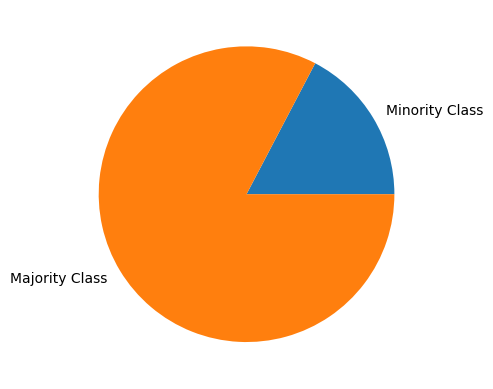

In [94]:
# plot a chart showing unbalance data

class_division = [ df[df[0] >= 0.5 ].shape[0], df[df[0] < 0.5 ].shape[0] ]
my_labels = ['Minority Class', 'Majority Class']

plt.pie(class_division, labels = my_labels)
plt.show()

In [186]:
#Oversampling

lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_train)
ros = RandomOverSampler(random_state=0)
ros.fit(X_train, y_train)
X_Oversampled, y_Oversampled = ros.fit_resample(X_train, y_transformed)

In [189]:
#Undersampling

lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_train)
ros = RandomUnderSampler(random_state=0)
ros.fit(X_train, y_train)
X_Undersampled, y_Undersampled = ros.fit_resample(X_train, y_transformed)

In [ ]:
#GBR result normal
# Using r2 score and meand square error metrics instead of classification report because it is a Regressor Problem

gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
test = gbr.predict(X_test)
print("R2 Score:", r2_score(y_test,test))
print("Mean Square Error:", mean_squared_error(y_test,test))


In [188]:
# GBR result with Oversampling
# Using r2 score and meand square error metrics instead of classification report because it is a Regressor Problem

gbr = GradientBoostingRegressor()
gbr.fit(X_Oversampled,y_Oversampled)
test = gbr.predict(X_test)
print("R2 Score:", r2_score(y_test,test))
print("Mean Square Error:", mean_squared_error(y_test,test))


R2 Score: -132.9110474250373
Mean Square Error: 182.69943956312216


In [ ]:
# GBR result with Undersampling
# Using r2 score and meand square error metrics instead of classification report because it is a Regressor Problem

gbr = GradientBoostingRegressor()
gbr.fit(X_Undersampled,y_Undersampled)
test = gbr.predict(X_test)
print("R2 Score:", r2_score(y_test,test))
print("Mean Square Error:", mean_squared_error(y_test,test))
